In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

import seaborn as sns

result_path= "D:\\Users\\chiawei\\Documents\\data\\CreditCardFraud\\output\\"

In [2]:
result = pd.read_csv(result_path + "CCFraudResult.csv")

result.head(n = 10)

,TrueLabel,Predicted,Score
0,0,0,0.364308
1,0,0,0.488116
2,0,0,1.015520
3,0,0,1.292705
4,0,0,4.619355
5,0,0,3.056745
6,0,0,0.605545
7,0,0,1.156458
8,0,0,0.262722
9,0,0,0.582825


# Plot the labels distribution


1    492
0    315
Name: TrueLabel, dtype: int64

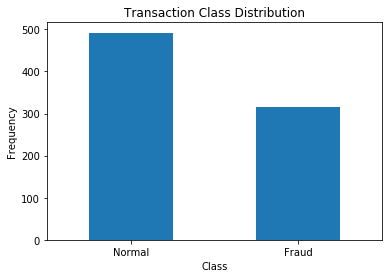

In [3]:
labels_dist = pd.value_counts(result["TrueLabel"], sort = True)


labels_dist.plot(kind = 'bar', rot = 0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel('Class')
plt.ylabel('Frequency')


labels_dist


# Plot the reconstruction error 

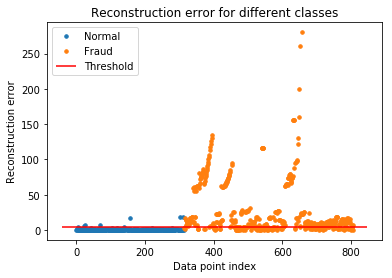

In [4]:
threshold = 5.0

groups = result.groupby('TrueLabel')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Score, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
   
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')


ax.legend()

plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();


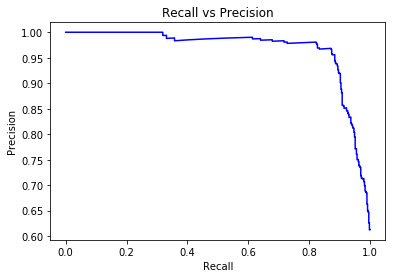

In [5]:
precision, recall, th = precision_recall_curve(result.TrueLabel, result.Score)

plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Precision 

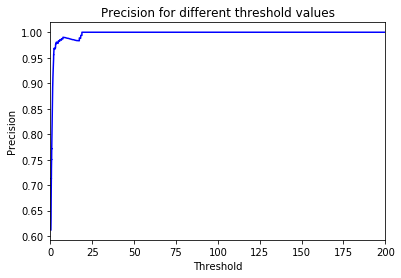

In [6]:

plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.xlim(0, 200)
plt.show()

In [7]:
# Recall

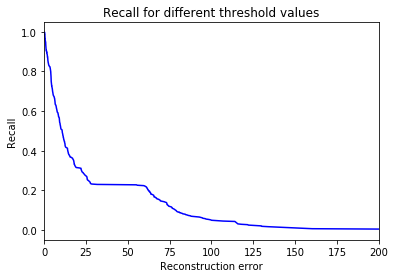

In [8]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.xlim(0, 200)
plt.show()

# Confusion Matrix

True Label
1    492
0    315
Name: TrueLabel, dtype: int64


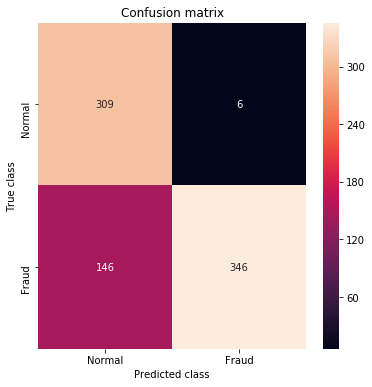

In [9]:

print("True Label")
print(labels_dist)

pred_y = [1 if e > threshold else 0 for e in result.Score.values]

conf_matrix = confusion_matrix(result.TrueLabel, pred_y)

[tn, fp], [fn, tp] = conf_matrix

#reminder: tp is fraud
plt.figure(figsize=(6, 6))

sns.heatmap(conf_matrix, xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()   


#Normal 28431
#Fraud 492



# ROC Curve 